# Super Bowl Strategy

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

import activity as act
import available as avb
import utils as self_utils
from quantified_strategies import strategy_utils as utils


In [2]:
MIN_DAYS_HELD = 1
MAX_DAYS_HELD = 25

BUY_N_DAYS_AFTER_SUPER_BOWL = 1

In [3]:
TICKER = "VUSA.LSE"

In [4]:
data = self_utils.run(ticker=TICKER, full=True)
data

{}
remove api from here


,asset,active,ret,ret_shifted,strat_ret,cum_strat_ret
Date,,,,,,
2012-05-24,12.4661,False,NaN,0.003112,0.0,0.000000
2012-05-25,12.5049,False,0.003112,0.004966,0.0,0.000000
2012-05-29,12.5670,False,0.004966,-0.005562,-0.0,0.000000
2012-05-30,12.4971,False,-0.005562,-0.001864,-0.0,0.000000
2012-05-31,12.4738,False,-0.001864,-0.005596,-0.0,0.000000
...,...,...,...,...,...,...
2024-02-27,75.8100,False,-0.004171,0.004122,0.0,0.173877
2024-02-28,76.1225,False,0.004122,0.001741,0.0,0.173877
2024-02-29,76.2550,False,0.001741,0.007540,0.0,0.173877


In [5]:
data = utils.get_data(ticker=TICKER, columns="Adj Close")
data = data.to_frame(name="asset")
data

{}
remove api from here


,asset
Date,
2012-05-24,12.4661
2012-05-25,12.5049
2012-05-29,12.5670
2012-05-30,12.4971
2012-05-31,12.4738
...,...
2024-02-27,75.8100
2024-02-28,76.1225
2024-02-29,76.2550


In [6]:
data["active"] = act.get_activity(data=data)
data["ret"] = data["asset"].pct_change()
data["ret_shifted"] = data["ret"].shift(-1)
data["strat_ret"] = data["active"] * data["ret_shifted"]
data

,asset,active,ret,ret_shifted,strat_ret
Date,,,,,
2012-05-24,12.4661,False,NaN,0.003112,0.0
2012-05-25,12.5049,False,0.003112,0.004966,0.0
2012-05-29,12.5670,False,0.004966,-0.005562,-0.0
2012-05-30,12.4971,False,-0.005562,-0.001864,-0.0
2012-05-31,12.4738,False,-0.001864,-0.005596,-0.0
...,...,...,...,...,...
2024-02-27,75.8100,False,-0.004171,0.004122,0.0
2024-02-28,76.1225,False,0.004122,0.001741,0.0
2024-02-29,76.2550,False,0.001741,0.007540,0.0


In [7]:
data["cum_strat_ret"] = utils.get_cumulative_return(returns=data["strat_ret"], total=False)
data

,asset,active,ret,ret_shifted,strat_ret,cum_strat_ret
Date,,,,,,
2012-05-24,12.4661,False,NaN,0.003112,0.0,0.000000
2012-05-25,12.5049,False,0.003112,0.004966,0.0,0.000000
2012-05-29,12.5670,False,0.004966,-0.005562,-0.0,0.000000
2012-05-30,12.4971,False,-0.005562,-0.001864,-0.0,0.000000
2012-05-31,12.4738,False,-0.001864,-0.005596,-0.0,0.000000
...,...,...,...,...,...,...
2024-02-27,75.8100,False,-0.004171,0.004122,0.0,0.173877
2024-02-28,76.1225,False,0.004122,0.001741,0.0,0.173877
2024-02-29,76.2550,False,0.001741,0.007540,0.0,0.173877


## Rules

The Super Bowl is on the 2nd Sunday in February.

1. Buy day after Super Bowl and Sell n days after.

In [8]:
TICKER = "VUSA.LSE"

### Get Data

In [9]:
sp500 = utils.get_data(ticker=TICKER, columns="Adj Close")
sp500 = sp500.to_frame(name=TICKER)
sp500.head(5)

{}
remove api from here


,VUSA.LSE
Date,
2012-05-24,12.4661
2012-05-25,12.5049
2012-05-29,12.5670
2012-05-30,12.4971
2012-05-31,12.4738


### Filter data from first Super Bowl

In [10]:
SUPER_BOWL_DATES = self_utils.get_super_bowl_dates()
SUPER_BOWL_DATES[-5:]

[datetime.date(2020, 2, 2),
 datetime.date(2021, 2, 7),
 datetime.date(2022, 2, 13),
 datetime.date(2023, 2, 12),
 datetime.date(2024, 2, 11)]

In [11]:
SUPER_BOWL_DATE_DICT = {date.year: date for date in SUPER_BOWL_DATES}

### Add all dates

In [12]:
sp500 = sp500.reindex(index=pd.date_range(start=sp500.index[0], end=sp500.index[-1]))

### Get Data from Super Bowl to N-days After

In [13]:
## Extract year from date
sp500["year"] = sp500.index.year

In [14]:
## Map year to Super Bowl date
sp500["date_of_super_bowl"] = sp500["year"].map(SUPER_BOWL_DATE_DICT)
## Remove years which don't have a Super Bowl
sp500 = sp500.loc[~sp500["date_of_super_bowl"].isna()].copy()

In [15]:
## Get days after super bowl
sp500["days_after_super_bowl"] = sp500.apply(lambda x: (x.name.date() - x["date_of_super_bowl"]).days, axis=1)
## Filter on days after super bowl between 0 and 21
sp500 = sp500.loc[(sp500["days_after_super_bowl"] >= BUY_N_DAYS_AFTER_SUPER_BOWL) & (sp500["days_after_super_bowl"] <= 21*2)].copy()
## Filter days out with no data
sp500 = sp500.loc[~sp500.index.weekday.isin([5, 6])]
# Forward Fill Index Values
sp500[TICKER] = sp500.groupby("year")[TICKER].ffill()

### Calculate return day-to-day after Super Bowl

In [17]:
sp500[f"{TICKER}_ret"] = sp500.groupby("year")[TICKER].pct_change()
sp500

,VUSA.LSE,year,date_of_super_bowl,days_after_super_bowl,VUSA.LSE_ret
2013-02-04,14.3301,2013,2013-02-03,1,NaN
2013-02-05,14.4837,2013,2013-02-03,2,0.010719
2013-02-06,14.4909,2013,2013-02-03,3,0.000497
2013-02-07,14.3798,2013,2013-02-03,4,-0.007667
2013-02-08,14.4051,2013,2013-02-03,5,0.001759
...,...,...,...,...,...
2024-02-27,75.8100,2024,2024-02-11,16,-0.004171
2024-02-28,76.1225,2024,2024-02-11,17,0.004122
2024-02-29,76.2550,2024,2024-02-11,18,0.001741
2024-03-01,76.8300,2024,2024-02-11,19,0.007540


### Calculate Cumulative Return from Super Bowl to N-days after

In [18]:
sp500[f"{TICKER}_cumret"] = sp500.groupby("year")[f"{TICKER}_ret"].apply(lambda x: (1 + x).cumprod() - 1).reset_index(level=0, drop=True)

In [19]:
sp500 = sp500.loc[(sp500["days_after_super_bowl"] >= MIN_DAYS_HELD) & (sp500["days_after_super_bowl"] <= MAX_DAYS_HELD)]

## Plot Strategy Results of Strategy

In [20]:
mu_ret = sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].mean().dropna()
sig_ret = sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].std().dropna()

In [21]:
(sp500.loc[sp500["days_after_super_bowl"] == 11, f"{TICKER}_cumret"] + 1).cumprod()

2013-02-14    1.027550
2014-02-13    1.046587
2015-02-12    1.060809
2016-02-18    1.114610
2017-02-16    1.135439
2018-02-15    1.112176
2019-02-14    1.148748
2020-02-13    1.189435
2021-02-18    1.171331
2022-02-24    1.126561
2023-02-23    1.098908
2024-02-22    1.103728
Name: VUSA.LSE_cumret, dtype: float64

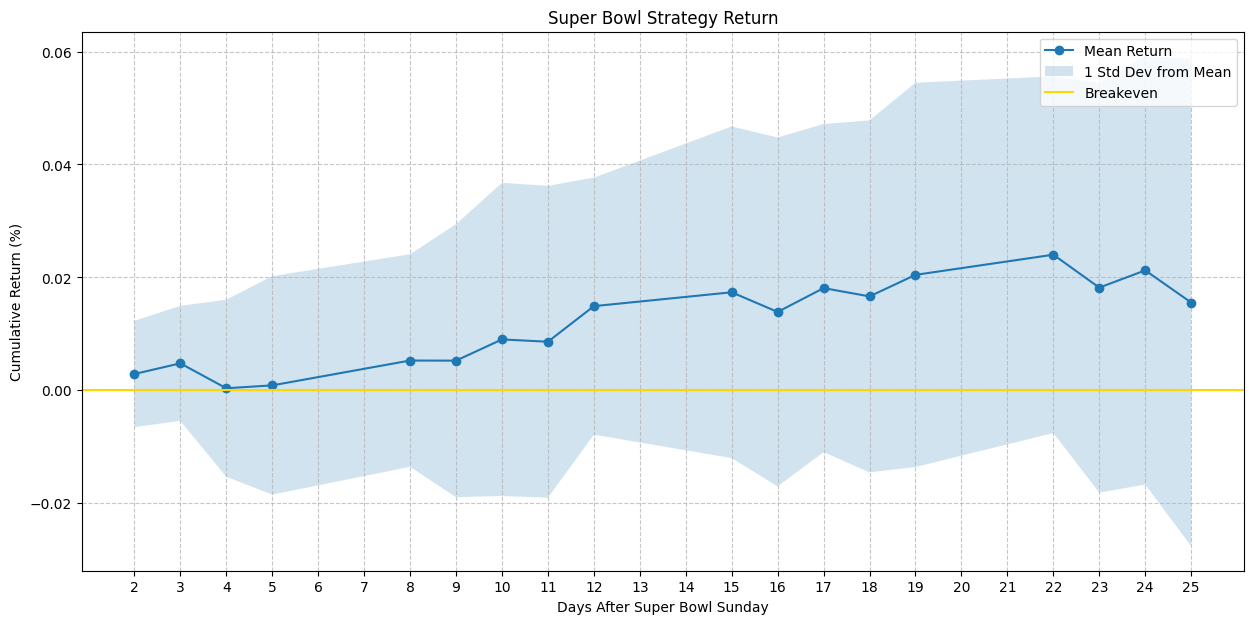

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(mu_ret, label="Mean Return", marker="o")
ax.fill_between(mu_ret.index.tolist(), mu_ret - sig_ret, mu_ret + sig_ret, alpha=0.2, label="1 Std Dev from Mean")
ax.axhline(y=0, label="Breakeven", color="gold")

ax.legend(loc="best")

plt.xticks(range(min(mu_ret.index), max(mu_ret.index) + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Days After Super Bowl Sunday")
plt.ylabel("Cumulative Return (%)")
plt.title("Super Bowl Strategy Return")
plt.show()

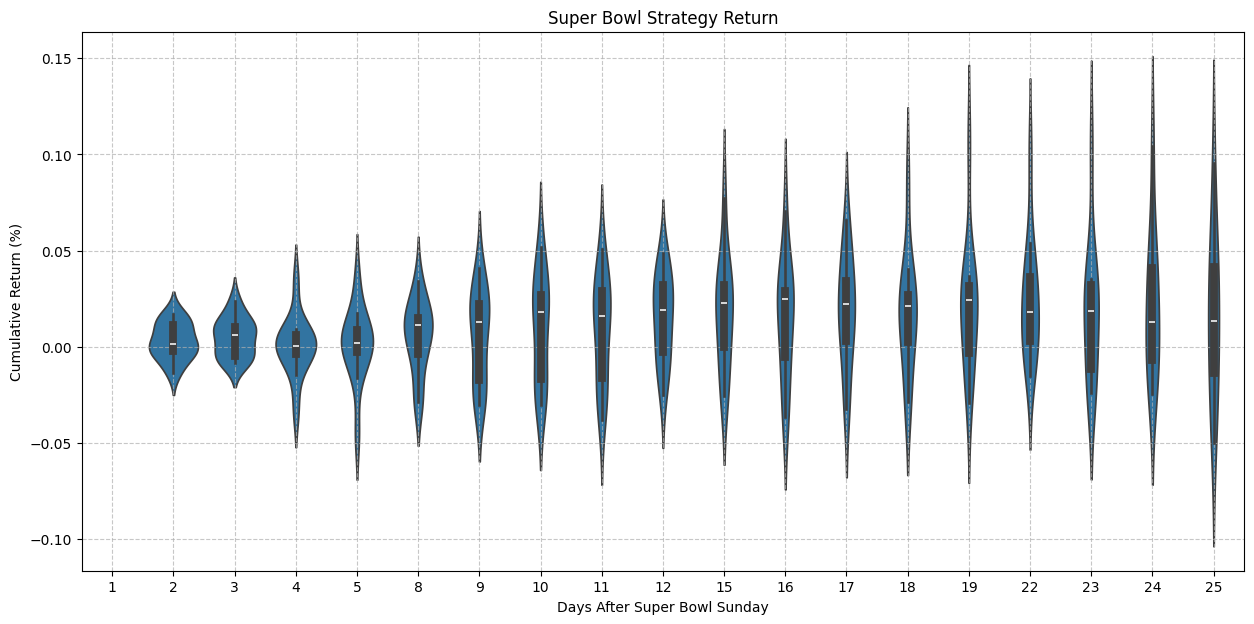

In [23]:

x = "days_after_super_bowl"
y = f"{TICKER}_cumret"

fig, ax = plt.subplots(figsize=(15, 7))

# Create a violin plot
sns.violinplot(x=x, y=y, data=sp500, ax=ax)

# Add labels and title
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Days After Super Bowl Sunday")
plt.ylabel("Cumulative Return (%)")
plt.title("Super Bowl Strategy Return")

# Show the plot
plt.show()

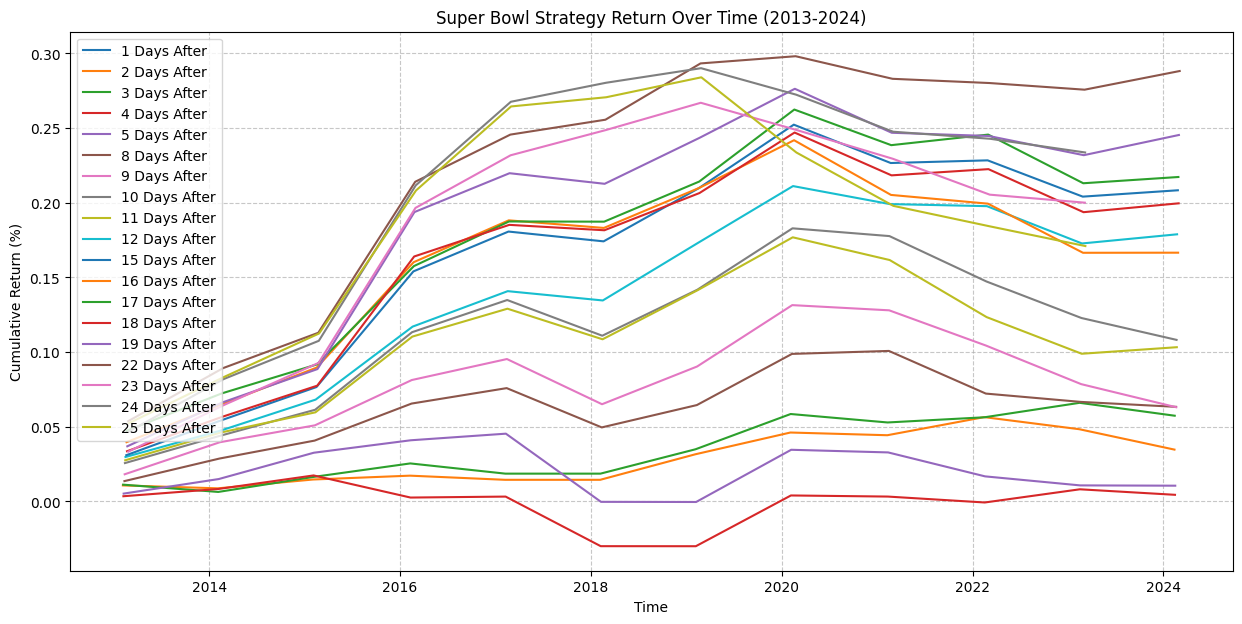

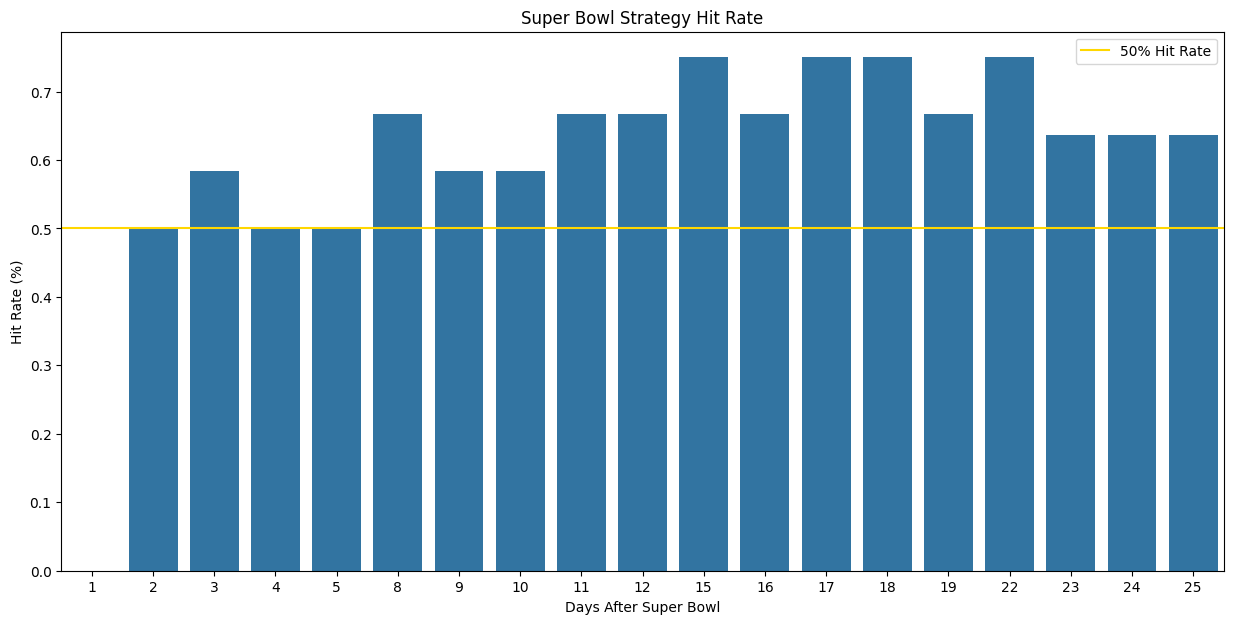

In [24]:
days_after_super_bowl_list = sp500["days_after_super_bowl"].unique().tolist()

fig, ax = plt.subplots(figsize=(15, 7))

for days_after in days_after_super_bowl_list:

    rets = sp500.loc[sp500["days_after_super_bowl"] == days_after, f"{TICKER}_cumret"]
    cum_ret = rets.cumsum()
    
    ax.plot(cum_ret, label=f"{days_after} Days After")
    
ax.legend(loc="best")

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Cumulative Return (%)")
plt.title(f"Super Bowl Strategy Return Over Time ({sp500.index[0].year}-{sp500.index[-1].year})")

plt.show()


fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].apply(lambda x: (x > 0).mean()))
ax.axhline(y=0.5, label="50% Hit Rate", color="gold")
ax.legend(loc="best")
plt.xlabel("Days After Super Bowl")
plt.ylabel("Hit Rate (%)")
plt.title(f"Super Bowl Strategy Hit Rate")
plt.show()


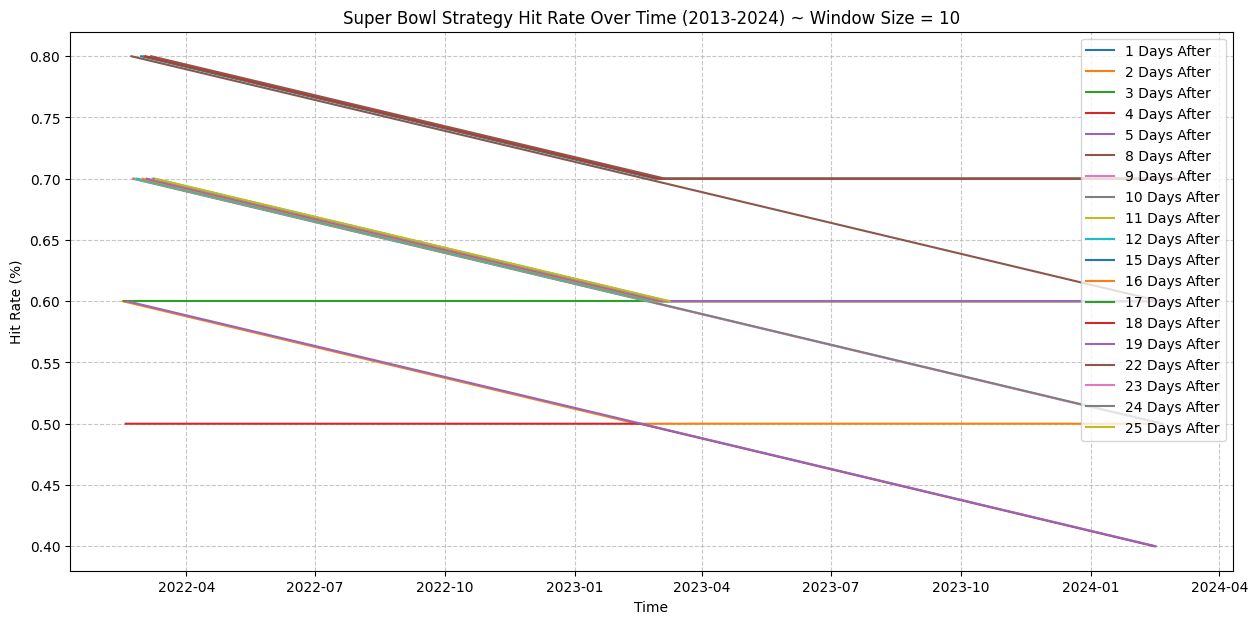

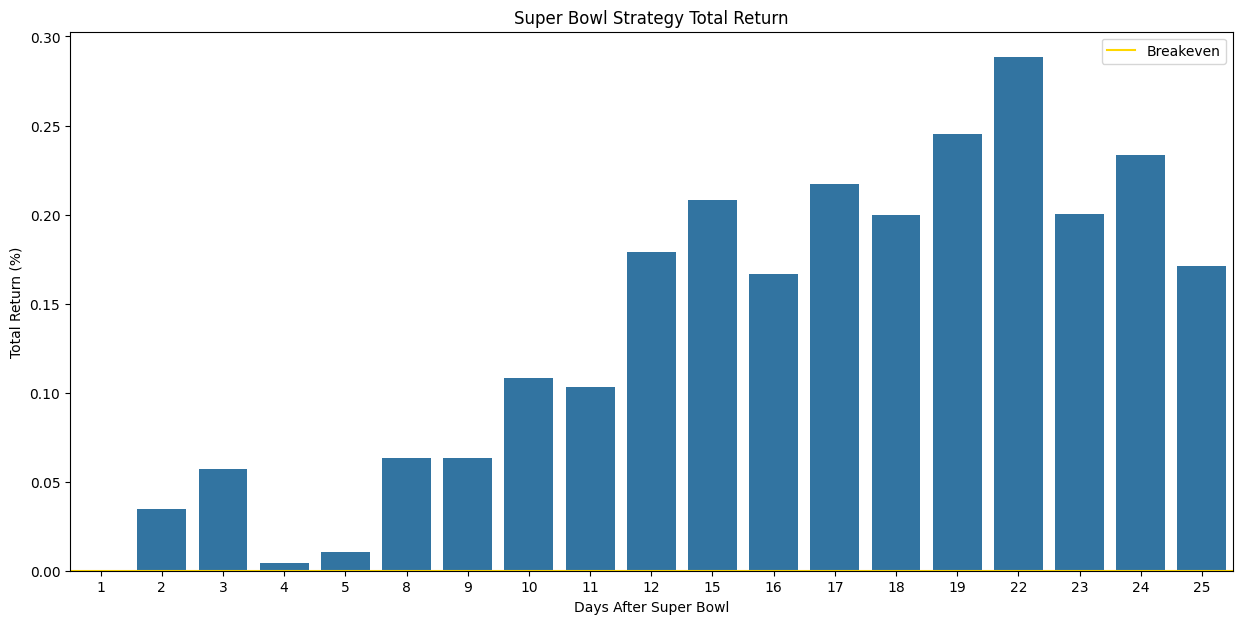

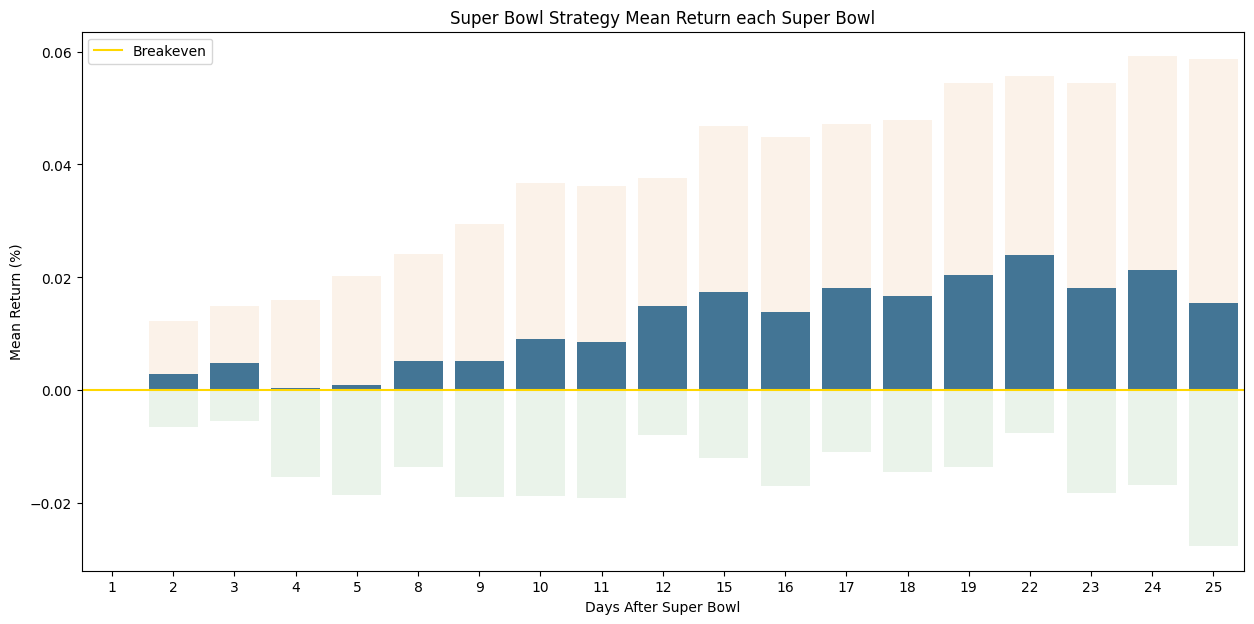

In [25]:
days_after_super_bowl_list = sp500["days_after_super_bowl"].unique().tolist()

# ROLLING HIT RATE

fig, ax = plt.subplots(figsize=(15, 7))

for days_after in days_after_super_bowl_list:

    rets = sp500.loc[sp500["days_after_super_bowl"] == days_after, f"{TICKER}_cumret"]
    ax.plot(rets.rolling(window=10).apply(lambda x: (x > 0).mean()), label=f"{days_after} Days After")
    
ax.legend(loc="best")

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Hit Rate (%)")
plt.title(f"Super Bowl Strategy Hit Rate Over Time ({sp500.index[0].year}-{sp500.index[-1].year}) ~ Window Size = 10")

plt.show()


fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].sum())
ax.axhline(y=0.0, label="Breakeven", color="gold")
ax.legend(loc="best")
plt.xlabel("Days After Super Bowl")
plt.ylabel("Total Return (%)")
plt.title(f"Super Bowl Strategy Total Return")
plt.show()


mu = sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].mean()
sig = sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].std()
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(mu)
sns.barplot(mu+sig, alpha=0.1)
sns.barplot(mu-sig, alpha=0.1)
ax.axhline(y=0.0, label="Breakeven", color="gold")
ax.legend(loc="best")
plt.xlabel("Days After Super Bowl")
plt.ylabel("Mean Return (%)")
plt.title(f"Super Bowl Strategy Mean Return each Super Bowl")
plt.show()


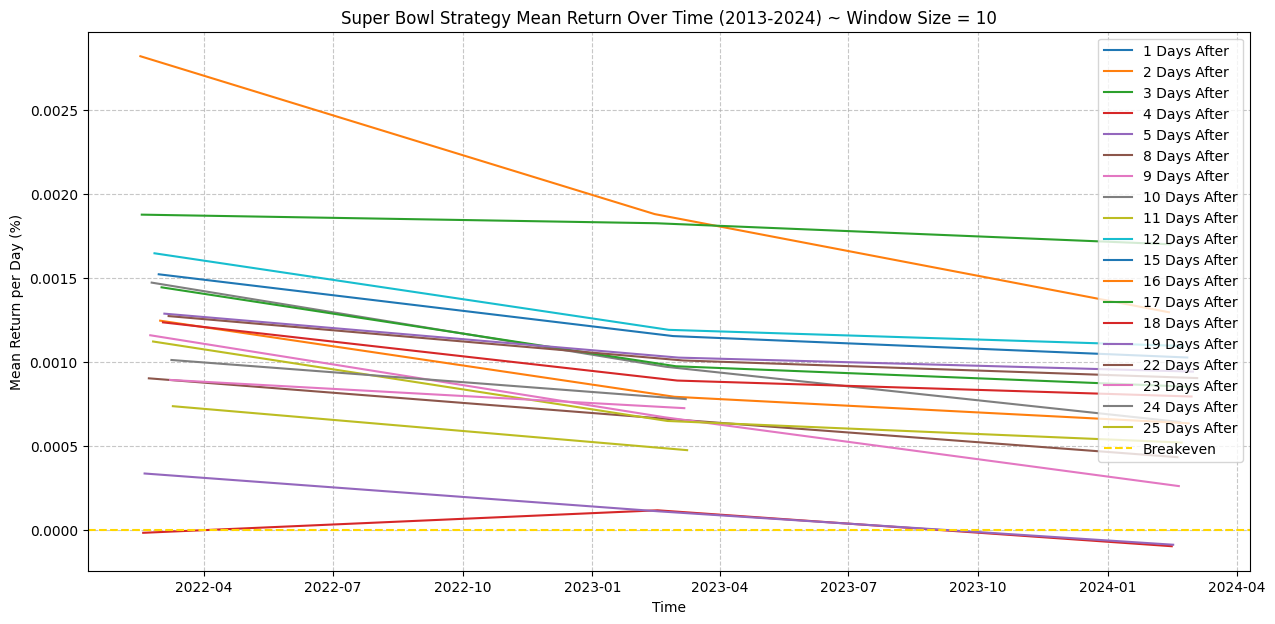

In [26]:
WINDOW_SIZE = 10

days_after_super_bowl_list = sp500["days_after_super_bowl"].unique().tolist()

fig, ax = plt.subplots(figsize=(15, 7))

for days_after in days_after_super_bowl_list:

    rets = sp500.loc[sp500["days_after_super_bowl"] == days_after, f"{TICKER}_cumret"]
    ax.plot(rets.rolling(window=WINDOW_SIZE).mean() / days_after, label=f"{days_after} Days After")

ax.axhline(y=0, label="Breakeven", color="gold", linestyle="--")
ax.legend(loc="best")

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Mean Return per Day (%)")
plt.title(f"Super Bowl Strategy Mean Return Over Time ({sp500.index[0].year}-{sp500.index[-1].year}) ~ Window Size = {WINDOW_SIZE}")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


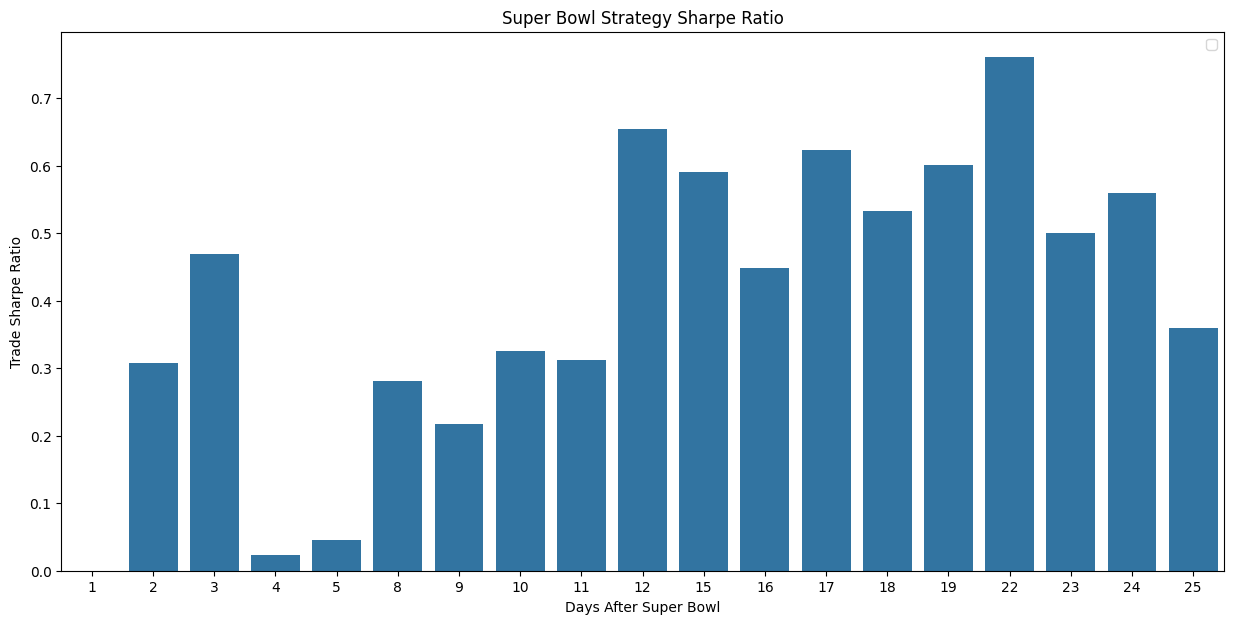

In [27]:

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].apply(lambda x: x.mean() / x.std()))
ax.legend(loc="best")
plt.xlabel("Days After Super Bowl")
plt.ylabel("Trade Sharpe Ratio")
plt.title(f"Super Bowl Strategy Sharpe Ratio")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


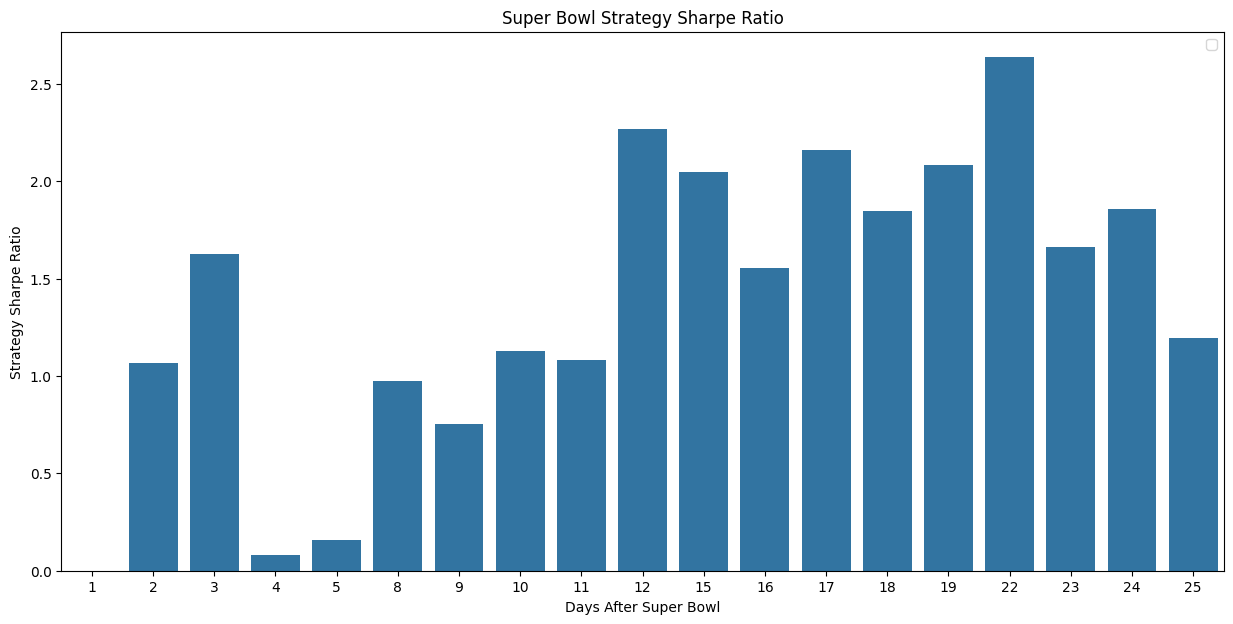

In [28]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(sp500.groupby("days_after_super_bowl")[f"{TICKER}_cumret"].apply(lambda x: x.mean() / x.std() * np.sqrt(x.shape[0])))
ax.legend(loc="best")
plt.xlabel("Days After Super Bowl")
plt.ylabel("Strategy Sharpe Ratio")
plt.title(f"Super Bowl Strategy Sharpe Ratio")
plt.show()

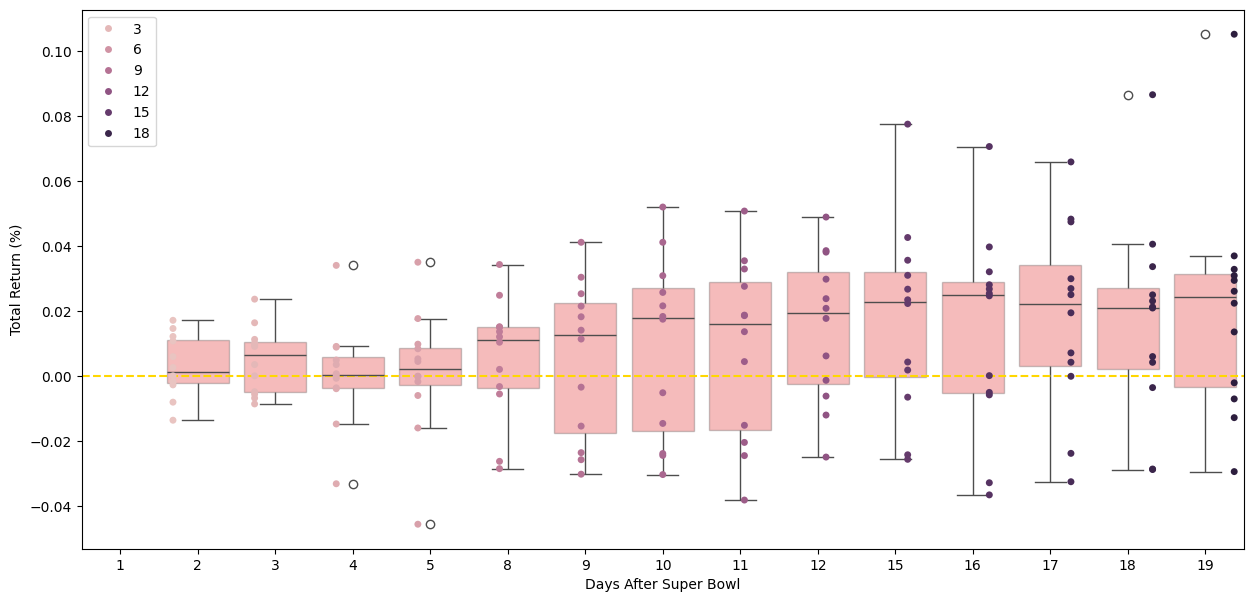

In [29]:
HOLD_LENGTH = 20

fig, ax = plt.subplots(figsize=(15, 7))

sns.stripplot(
    data=sp500.loc[sp500["days_after_super_bowl"] <= HOLD_LENGTH], 
    x="days_after_super_bowl", 
    y=f"{TICKER}_cumret", 
    hue="days_after_super_bowl",
    dodge=True, jitter=False,
    ax=ax,
)
sns.boxplot(x="days_after_super_bowl", y=f"{TICKER}_cumret", data=sp500.loc[sp500["days_after_super_bowl"] <= HOLD_LENGTH], color='red', boxprops=dict(alpha=0.3))

ax.axhline(y=0, color="gold", label="Breakeven", linestyle="--")

plt.xlabel("Days After Super Bowl")
plt.ylabel("Total Return (%)")

plt.show()
